In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd Desktop/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1658079056283.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,07/15/2022,3863.16,--,3818.00,3863.62,3817.18
1,07/14/2022,3790.38,--,3763.99,3796.41,3721.56
2,07/13/2022,3801.78,--,3779.67,3829.44,3759.07
3,07/12/2022,3818.80,--,3851.95,3873.41,3802.36
4,07/11/2022,3854.43,--,3880.94,3880.94,3847.22
...,...,...,...,...,...,...
2543,07/23/2012,1350.52,--,1362.34,1362.34,1337.56
2544,07/20/2012,1362.66,--,1376.51,1376.51,1362.19
2545,07/19/2012,1376.51,--,1373.01,1380.39,1371.21
2546,07/18/2012,1372.78,--,1363.58,1375.26,1358.96


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2548.000000,2548.000000,2548.000000,2548.000000
mean,2616.683140,2593.706888,2607.122316,2579.047272
std,873.667682,916.489196,922.417207,909.651298
min,1337.890000,0.000000,0.000000,0.000000
25%,1985.440000,1978.240000,1986.337500,1969.197500
50%,2428.690000,2428.950000,2439.220000,2413.530000
75%,3005.955000,3007.850000,3017.225000,2992.275000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,2627.094607,2626.695211,2640.281264,2611.849145
std,873.808247,874.045188,879.827092,867.344373
min,1337.890000,1338.170000,1343.980000,1329.240000
25%,1989.615000,1989.347500,1997.567500,1979.057500
50%,2438.065000,2436.445000,2449.015000,2428.160000
75%,3013.327500,3014.997500,3026.055000,2999.762500
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Volume      2516 non-null   object 
 3   Open        2516 non-null   float64
 4   High        2516 non-null   float64
 5   Low         2516 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.6+ KB


In [5]:
df.shape

(2516, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

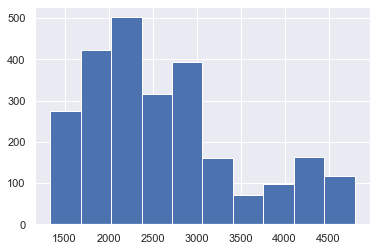

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

3863.16

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2627.0946065182925

In [10]:
close_sd = df['Close/Last'].std()
close_sd

873.8082469198223

In [11]:
sigma1 = close_mean + close_sd
sigma1

3500.902853438115

In [12]:
sigma2 = close_mean + (2 * close_sd)
sigma2

4374.7111003579375

In [13]:
sigma3 = close_mean + (3 * close_sd)
sigma3

5248.519347277759

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2547
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2012-07-17 to 2022-07-15')

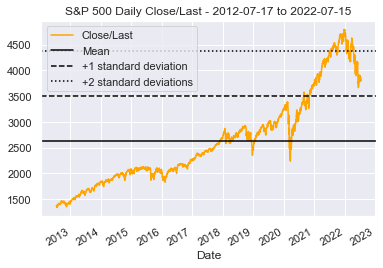

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2012-07-17 to 2022-07-15')

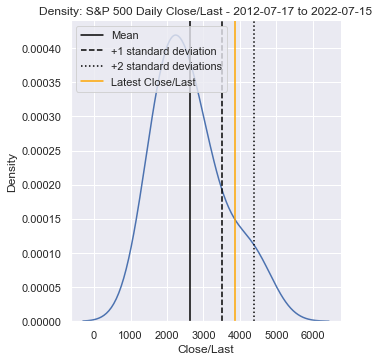

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.4145728171356164